In [7]:
import pandas as pd
import numpy as np

In [8]:
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt
from matplotlib import style

In [9]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('data/Titanic.csv',index_col=0)

In [10]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
dataset.drop('Name', axis=1, inplace=True)
dataset.drop('Ticket', axis=1, inplace=True)
dataset.drop('Cabin', axis=1, inplace=True)
dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

In [12]:
dataset.Embarked[dataset.Embarked == 'S'] = 1
dataset.Embarked[dataset.Embarked == 'C'] = 2
dataset.Embarked[dataset.Embarked == 'Q'] = 3
dataset.Sex[dataset.Sex == 'male'] = 1
dataset.Sex[dataset.Sex == 'female'] = 0

<ipython-input-12-c903657a8ad0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Embarked[dataset.Embarked == 'S'] = 1
<ipython-input-12-c903657a8ad0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Embarked[dataset.Embarked == 'C'] = 2
<ipython-input-12-c903657a8ad0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Embarked[dataset.Embarked == 'Q'] = 3
<ipython-input-12-c903657a8ad0>:4: SettingWithCopyWarning:

In [13]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1
2,1,1,0,38.0,1,0,71.2833,2
3,1,3,0,26.0,0,0,7.9250,1
4,1,1,0,35.0,1,0,53.1000,1
5,0,3,1,35.0,0,0,8.0500,1


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [15]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'survived/non survive')

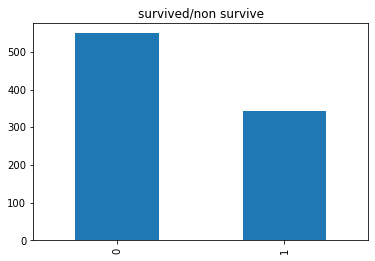

In [16]:
dataset.Survived.value_counts().plot(kind='bar');
plt.title("survived/non survive")

C:\Users\TRAINING19\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\TRAINING19\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


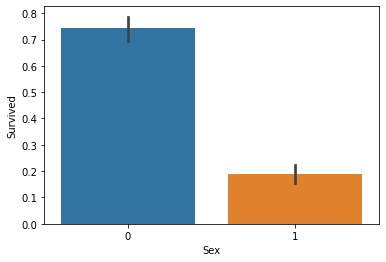

<Figure size 576x288 with 0 Axes>

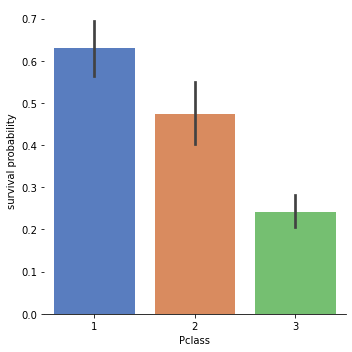

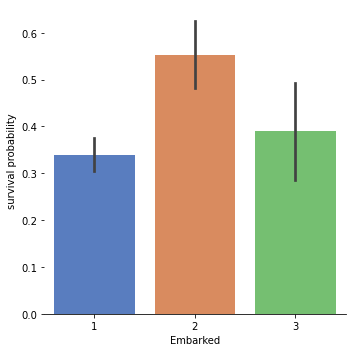

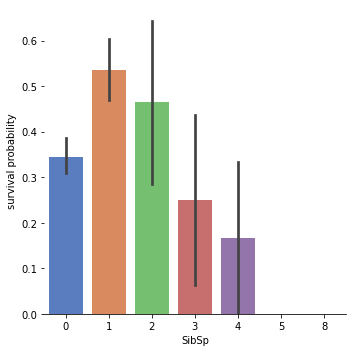

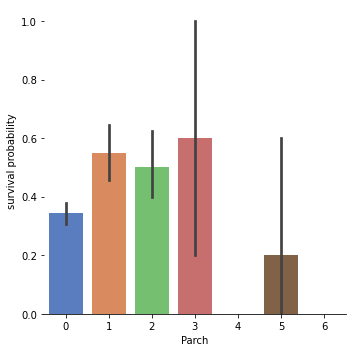

In [29]:
#Survived based on Sex
g = sns.barplot(x="Sex",y="Survived",data=dataset)
plt.figure(figsize=(8,4))

#Survived based on Pclass
g = sns.factorplot(x="Pclass",y="Survived",data=dataset,kind="bar", size = 5 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

#Survived based on Embarked
g = sns.factorplot(x="Embarked", y="Survived",  data=dataset,
                   size=5, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

#Survived based on Embarked
g = sns.factorplot(x="SibSp",y="Survived",data=dataset,kind="bar", size = 5 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

#Survived based on Embarked
g  = sns.factorplot(x="Parch",y="Survived",data=dataset,kind="bar", height = 5 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

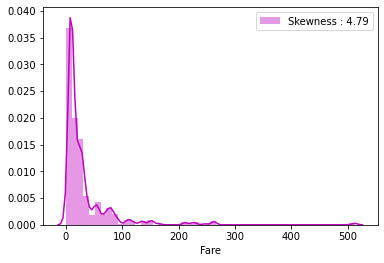

In [18]:
g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

In [24]:
feature_col = ['Pclass', 'Age','SibSp','Parch','Fare']
X = dataset[feature_col]
Y = dataset['Survived']

In [25]:
X

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,28.0,1,2,23.4500


In [21]:
xtrain_ds, xtest_ds, ytrain_ds, ytest_ds = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [26]:
logreg_clf = LogisticRegression()
logreg_clf.fit(xtrain_ds, ytrain_ds)
pred_logreg = logreg_clf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_logreg))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       110
           1       0.73      0.51      0.60        69

    accuracy                           0.74       179
   macro avg       0.73      0.69      0.70       179
weighted avg       0.74      0.74      0.73       179



In [30]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(xtrain_ds, ytrain_ds)
pred_knn = knn_clf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       110
           1       0.67      0.59      0.63        69

    accuracy                           0.73       179
   macro avg       0.72      0.71      0.71       179
weighted avg       0.73      0.73      0.73       179



In [31]:
svc_clf = SVC(kernel='rbf',C=1,gamma=0.1) 
svc_clf.fit(xtrain_ds, ytrain_ds)
pred_svc = svc_clf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_svc))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       110
           1       0.74      0.41      0.52        69

    accuracy                           0.72       179
   macro avg       0.72      0.66      0.66       179
weighted avg       0.72      0.72      0.69       179



In [32]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtrain_ds, ytrain_ds)
pred_rf = rf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       110
           1       0.64      0.61      0.62        69

    accuracy                           0.72       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.71      0.72      0.71       179



In [33]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(xtrain_ds, ytrain_ds)
pred_dectree = decision_tree.predict(xtest_ds) 
print(classification_report(ytest_ds, pred_dectree))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       110
           1       0.54      0.43      0.48        69

    accuracy                           0.64       179
   macro avg       0.61      0.60      0.60       179
weighted avg       0.63      0.64      0.63       179

